<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#T-score" data-toc-modified-id="T-score-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>T-score</a></span></li><li><span><a href="#p-value-(one-sided)" data-toc-modified-id="p-value-(one-sided)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>p-value (one-sided)</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [62]:
import numpy as np
import pandas as pd
import scipy

# pandas display settings
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('precision',2)
pd.set_option('display.max_colwidth', -1)
np.set_printoptions(precision=2)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# ipython display
from IPython.display import Image

# data dirs
snap_dir = '../data/snapshots/'
data_dir = '../data/excel/'

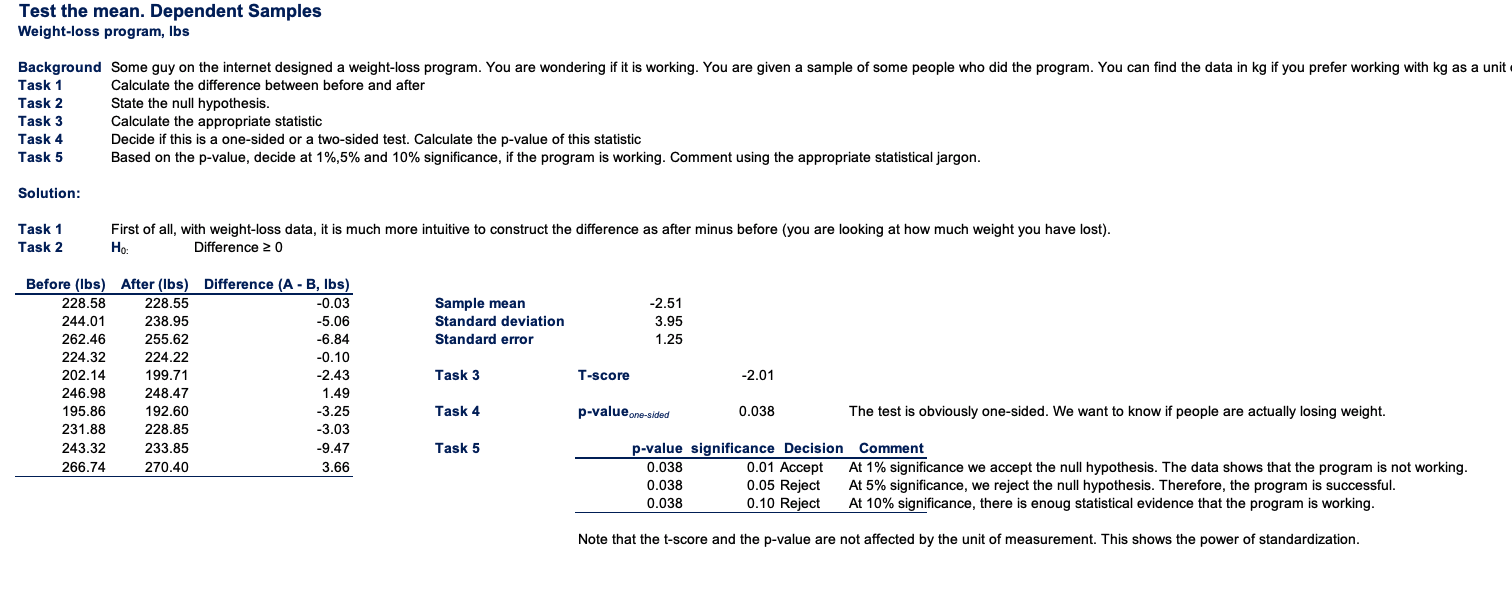

In [63]:
Image(filename=(snap_dir + 'sol_4.7.png'),width=1000)

In [64]:
import numpy as np
import pandas as pd

df = pd.read_excel(data_dir + '4.7.Test-for-the-mean.Dependent-samples-exercise.xlsx',
                  sheet_name = 0,
                  skiprows = 10, # number of row of header shown in excel sheet -1
                  usecols = "B:C") # None for all columns
print(df.shape)
print(df)

(10, 2)
   Before (lbs)  After (lbs)
0  228.58        228.55     
1  244.01        238.95     
2  262.46        255.62     
3  224.32        224.22     
4  202.14        199.71     
5  246.98        248.47     
6  195.86        192.60     
7  231.88        228.85     
8  243.32        233.85     
9  266.74        270.40     


In [65]:
df.columns = ['before','after']
df

,before,after
0,228.58,228.55
1,244.01,238.95
2,262.46,255.62
3,224.32,224.22
4,202.14,199.71
5,246.98,248.47
6,195.86,192.60
7,231.88,228.85
8,243.32,233.85
9,266.74,270.40


In [66]:
df['diff'] = df['after'] - df['before']
df

,before,after,diff
0,228.58,228.55,-0.03
1,244.01,238.95,-5.06
2,262.46,255.62,-6.84
3,224.32,224.22,-0.10
4,202.14,199.71,-2.43
5,246.98,248.47,1.49
6,195.86,192.60,-3.25
7,231.88,228.85,-3.03
8,243.32,233.85,-9.47
9,266.74,270.40,3.66


In [67]:
xbar = df['diff'].mean()
s = df['diff'].std()
n = df.shape[0]
std_err = s/np.sqrt(n)

# precision does not work
np.set_printoptions(2)
# %precision 3


xbar,s,std_err

(-2.5070888468999954, 3.952592318932194, 1.2499194389912407)

In [68]:
type(xbar), type(s), type(std_err)

(numpy.float64, numpy.float64, numpy.float64)

In [69]:
np.set_printoptions(2)
a = 2.5070888468999954
a

2.507

# T-score

In [70]:
mu0 = 0.0
T_score = (xbar - mu0) / std_err
T_score

-2.005800348959582

# p-value (one-sided)

In [71]:
import scipy # scipy.stats.norm.ppf etc

n = 10
nsided = 1
p_value = scipy.stats.t.sf(np.abs(T_score), n-1)*nsided # sf is survival function
p_value

0.037920056200565835

# Summary

In [75]:
df3 = pd.DataFrame()

df3['p_value'] = [p_value]*3
df3['significance'] = [0.01,0.05,0.10]


# H0 using p-value
# small pain p-value is good, we reject the null hypothesis and say the test is good.
mask = df3['p_value'] < df3['significance']

cond1 = 'At ' + (df3['significance']*100).astype(int).astype(str) +\
        '% significance, we reject the null hypothesis. The program is working.'

cond2 = 'At ' + (df3['significance']*100).astype(int).astype(str) +\
        '% significance, we accept the null hypothesis. The program is not working.'

df3['Accept/Reject H0'] = np.where(mask, 'Reject','Accept')

df3['Comment'] = np.where(mask,cond1, cond2) 

df3
# df3.style.set_precision(2)

,p_value,significance,Accept/Reject H0,Comment
0,0.04,0.01,Accept,"At 1% significance, we accept the null hypothesis. The program is not working."
1,0.04,0.05,Reject,"At 5% significance, we reject the null hypothesis. The program is working."
2,0.04,0.10,Reject,"At 10% significance, we reject the null hypothesis. The program is working."


In [90]:
def highlight(df):
    c1 = 'background-color: #83AF9B'
    c2 = 'background-color: #A7226E'
    df1 = pd.DataFrame(c2, index=df.index, columns=df.columns)
    
    # mask
    colA,colB = 'p_value', 'significance'
    mask = df[colA] < df[colB] 
    df1.loc[mask] = c1

    return df1

df3.style.apply(highlight, axis=None)

,p_value,significance,Accept/Reject H0,Comment
0,0.038,0.01,Accept,"At 1% significance, we accept the null hypothesis. The program is not working."
1,0.038,0.05,Reject,"At 5% significance, we reject the null hypothesis. The program is working."
2,0.038,0.1,Reject,"At 10% significance, we reject the null hypothesis. The program is working."
